In [61]:
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import sca

from experiments.evaluation_flow.shared import GOOGLENET, RESNET_152, MOBILENET, RESNET_18, RESNET_50
from experiments.plots.util import *
import matplotlib

In [62]:
# define the directory containing the experiment logsfrom experiments.util.extract_data import ns2s
BASELINE = 'baseline'
PARAM_UPDATE = 'param_update'
PARAM_UPDATE_IMPROVED = 'param_update_improved'
PROVENANCE = 'provenance'

VERSION = 'version'
FINE_TUNED = 'fine-tuned'

ROOT_LOG_DIR = '/Users/nils/uni/mmlib-paper/master-thesis/experiments/plots/evaluation-flow-results/results'

In [63]:
# the storage consumption is determined on the server -> filter files that are server logs
all_files = all_files_in_dir(ROOT_LOG_DIR)
server_files = [f for f in all_files if 'server' in f]

In [64]:
U_IDS = 'u_ids'
# for all files extract the metadata (e.g. what model and dataset is used)
server_files_and_meta = [(extract_file_meta(f), f) for f in server_files]
# add a mapping: use_case -> model id
server_files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in server_files_and_meta]

In [65]:
# add the total storage consumption, and the detailed storage consumption to the metadata
# and save all metadata as a list in the variable storage_meta
storage_meta = []
for f in server_files_and_meta:
    use_case_id_dict = f[0][U_IDS]
    consumptions = {}
    total_consumptions = {}
    for use_case in use_case_id_dict.keys():
        s_info = storage_info(f[1], use_case_id_dict[use_case])
        consumptions[use_case] = s_info
        total_consumptions[use_case] = total_storage_consumption(s_info)

    f[0].update({CONSUMPTIONS: consumptions, TOTAL_CONSUMPTIONS: total_consumptions})
    storage_meta.append(f[0])

In [66]:
def plot_single_storage_consumption(meta, save_path=None, ignore_use_cases=[], y_min_max=None, _flat=False):

    plt.rc('font', size=30)

    fig = plt.figure()
    if _flat:
        fig.set_size_inches(8, 4)
        y_lab = 'Storage cons. in MB'
    else:
        fig.set_size_inches(8, 6)
        y_lab = 'Storage consumption in MB'
    ax = fig.add_axes([0, 0, 1, 1])
    cons = meta[TOTAL_CONSUMPTIONS]
    for uc in ignore_use_cases:
        del cons[uc]
    use_cases = list(cons.keys())
    values = [c * 10 ** -6 for c in list(cons.values())]  # byte -> MB
    ax.bar(use_cases, values, color=HPI_LIGHT_ORANGE)
    ax.set_ylabel(y_lab)
    ax.set_xlabel('Use case')
    plt.xticks(rotation=45, ha='right')
    if y_min_max:
        axes = plt.gca()
        axes.set_ylim(y_min_max)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')
        fig.savefig(save_path + '.pdf', bbox_inches='tight')

    plt.show()

    print(cons)


def plot_median_storage_consumption(metas, save_path=None, ignore_use_cases=[], y_min_max=None, _flat=False):
    agg = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)
    plot_single_storage_consumption(agg, save_path, ignore_use_cases, y_min_max, _flat)

In [67]:
#################################
# Plots for baseline approach
#################################

In [68]:
#################################
# Storage consumption is independent of use case
# Only exception is U1 vs all other ruse cases:
# For U1 we save no base model reference, for all other we do
#################################

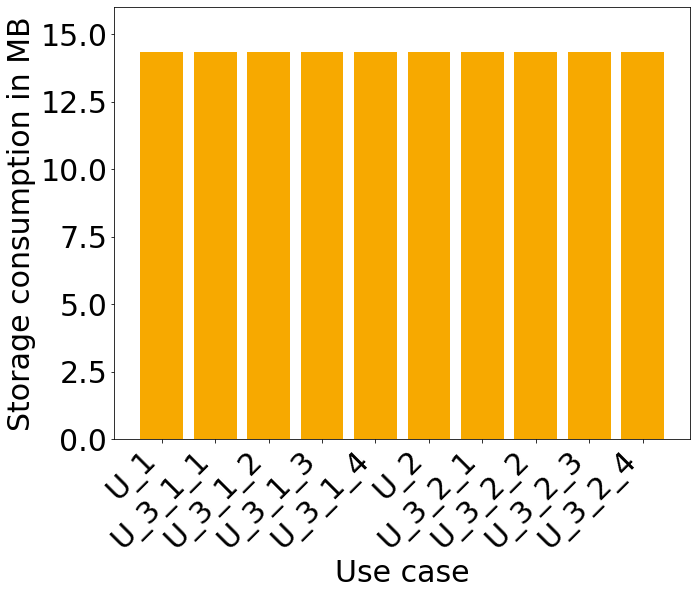

{'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}


In [69]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-mobilenet-version-food', y_min_max=[0,16])

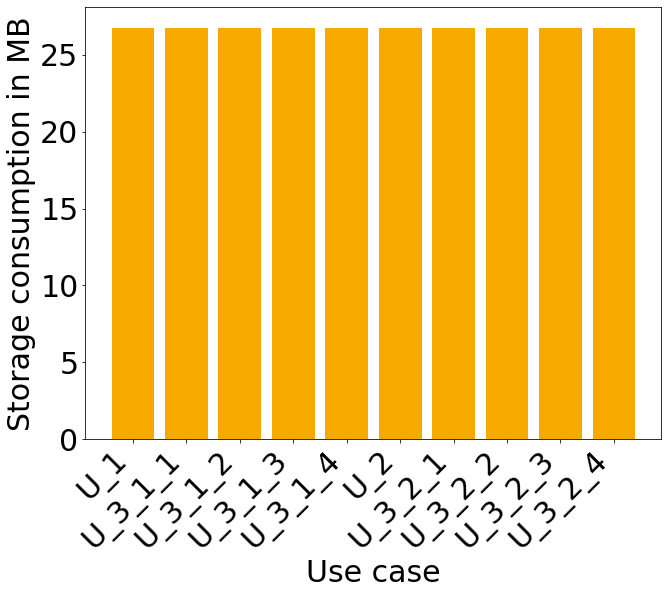

{'U_1': 26769975.0, 'U_3_1_1': 26770018.0, 'U_3_1_2': 26770018.0, 'U_3_1_3': 26770018.0, 'U_3_1_4': 26770018.0, 'U_2': 26770018.0, 'U_3_2_1': 26770018.0, 'U_3_2_2': 26770018.0, 'U_3_2_3': 26770018.0, 'U_3_2_4': 26770018.0}


In [70]:
metas = filter_meta(storage_meta, model=GOOGLENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-googlenet-version-food')

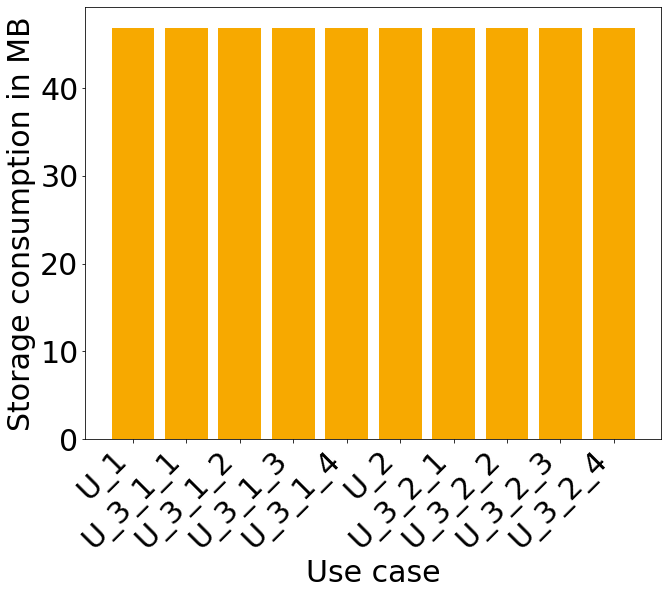

{'U_1': 46873903.0, 'U_3_1_1': 46873946.0, 'U_3_1_2': 46873946.0, 'U_3_1_3': 46873946.0, 'U_3_1_4': 46873946.0, 'U_2': 46873946.0, 'U_3_2_1': 46873946.0, 'U_3_2_2': 46873946.0, 'U_3_2_3': 46873946.0, 'U_3_2_4': 46873946.0}


In [71]:
metas = filter_meta(storage_meta, model=RESNET_18, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-resnet18-version-food')

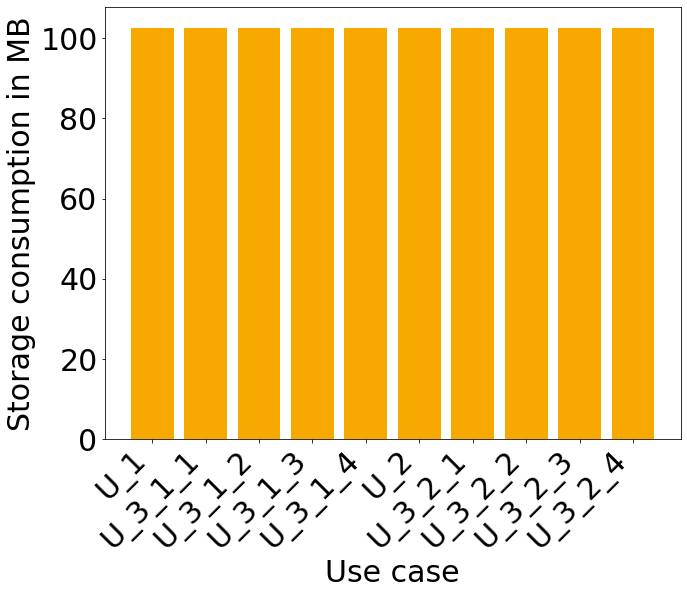

{'U_1': 102627679.0, 'U_3_1_1': 102627722.0, 'U_3_1_2': 102627722.0, 'U_3_1_3': 102627722.0, 'U_3_1_4': 102627722.0, 'U_2': 102627722.0, 'U_3_2_1': 102627722.0, 'U_3_2_2': 102627722.0, 'U_3_2_3': 102627722.0, 'U_3_2_4': 102627722.0}


In [72]:
metas = filter_meta(storage_meta, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-resnet50-version-food')

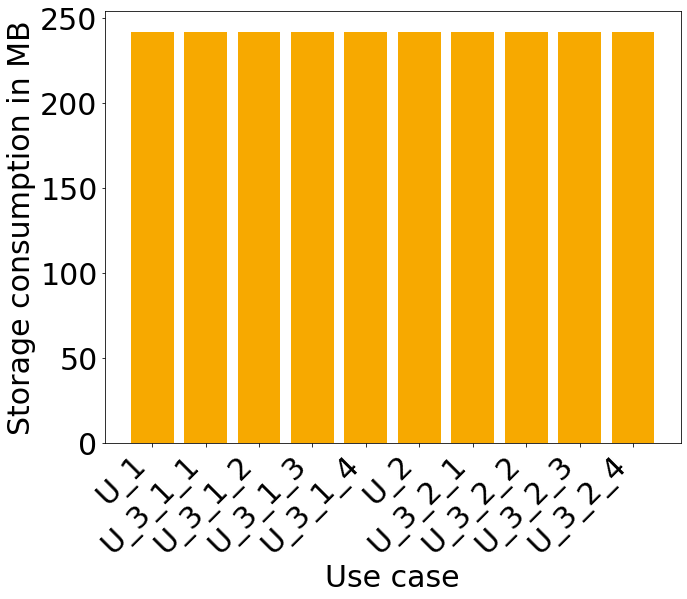

{'U_1': 241902565.0, 'U_3_1_1': 241902608.0, 'U_3_1_2': 241902608.0, 'U_3_1_3': 241902608.0, 'U_3_1_4': 241902608.0, 'U_2': 241902608.0, 'U_3_2_1': 241902608.0, 'U_3_2_2': 241902608.0, 'U_3_2_3': 241902608.0, 'U_3_2_4': 241902608.0}


In [73]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-resnet152-version-food')

In [74]:
#################################
# Storage consumption is only dependent on the used model
# To show: plot mobilenet storage consumptions with different snapshot_type and snapshot_dist
#################################

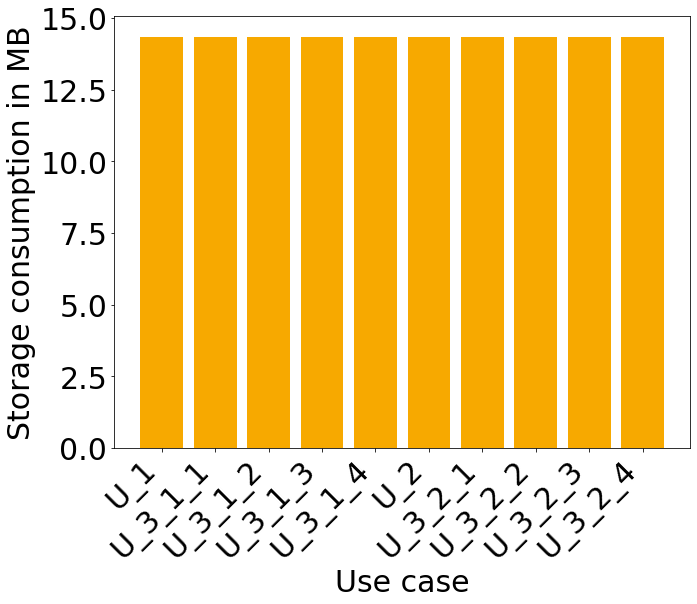

{'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}


In [75]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-mobilenet-version-food')

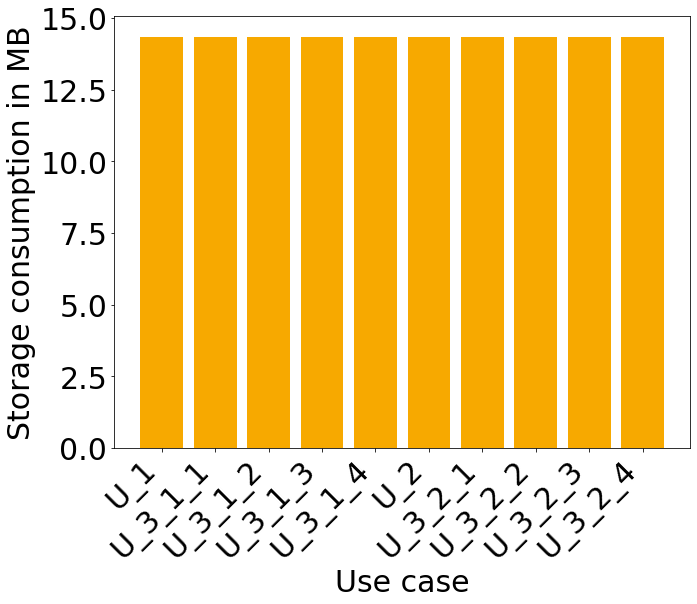

{'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}


In [76]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type='fine-tuned',
                    snapshot_dist='outdoor')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-mobilenet-finetuned-outdoor')

In [77]:
#################################
# All U1 sizes per model
#################################
models = [MOBILENET, GOOGLENET, RESNET_18, RESNET_50, RESNET_152]
u1_sizes = []
for m in models:
    metas = filter_meta(storage_meta, model=m, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
    u1_sizes.append(metas[0][TOTAL_CONSUMPTIONS][U_1] * 10 ** -6)

In [142]:
MODEL_PARAMETERS = np.array([3504872, 6624904, 11689512, 25557032, 60192808]) * 10**-6
def plot_storage_distribution(x_data, y_data, save_path=None):
    plt.rc('font', size=50)
    fig = plt.figure()
    fig.set_size_inches(8, 6)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(x_data, y_data, color=A_RED)
    ax.set_ylabel('Consumption in MB', color=A_RED)
    ax.set_xlabel('Model')
    plt.xticks(rotation=45)

    ax2 = ax.twinx()
    ax2.plot(x_data, MODEL_PARAMETERS, color=A_GREEN, marker="o", markersize=20)
    ax2.set_ylabel("No. params (* 10^6)", color=A_GREEN)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')
        fig.savefig(save_path + '.pdf', bbox_inches='tight')

    plt.show()

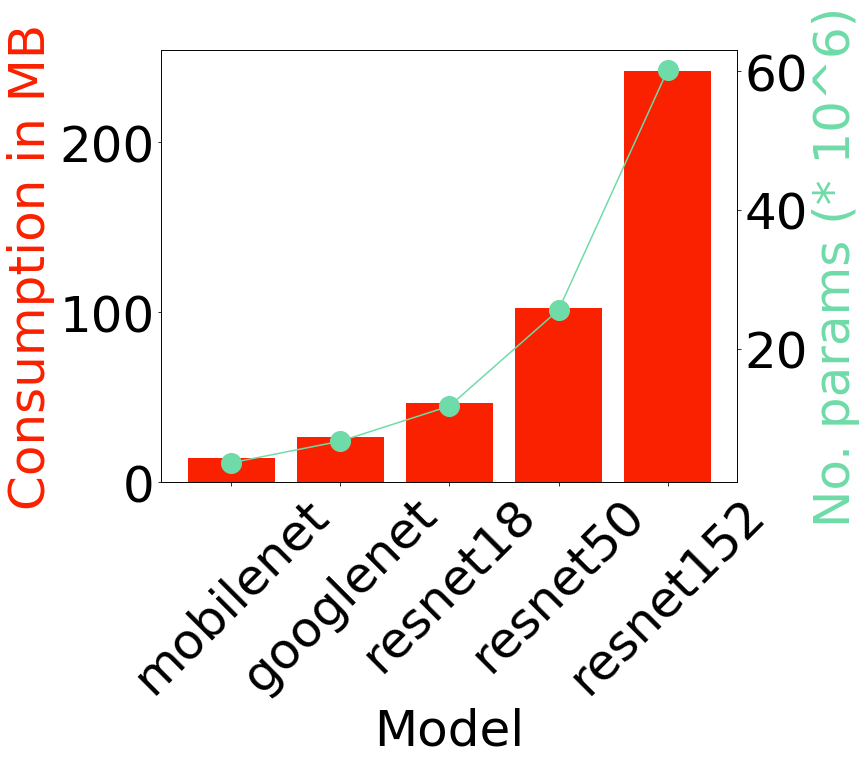

In [143]:
plot_storage_distribution(models, u1_sizes, save_path='./saved-plots/baseline/model-storage-consumptions-and-params')

In [80]:
#################################
# Analyse the distribution of the consumed storage
#################################
meta = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')[0]
u_2_storage_consumption = meta[CONSUMPTIONS][U_2]
flat = flatten_dict(u_2_storage_consumption)
_baseline_mobilenet_meta_params = split_in_params_and_rest(flat)

# meta_code_params_dict = {BASELINE: meta_params, 'baseline2': meta_params}
meta_params_dict = {BASELINE: _baseline_mobilenet_meta_params}

In [81]:
colors = [HPI_LIGHT_ORANGE, HPI_RED, HPI_ORANGE, YELLOW]


def plot_abs_storage_dist(_meta_code_params_dict, save_path=None, font_size=None):
    if font_size:
        plt.rc('font', size=font_size)
    else:
        plt.rc('font', size=28)
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(4)

    f.set_size_inches(16, 3)
    approaches = list(_meta_code_params_dict.keys())
    labels = list(list(_meta_code_params_dict.values())[0].keys())
    data = [list(mcp.values()) for mcp in _meta_code_params_dict.values()]

    pos = range(len(approaches))

    prev = np.zeros(len(data))
    for i in range(len(labels)):
        d = np.array([x[i] for x in data]) *10**-6
        plt.barh(pos, d, left=prev, color=colors[i])
        prev += d

    plt.legend(labels, loc='lower right')
    plt.yticks(pos, approaches)
    plt.xlabel('Storage consumption in MB')

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        plt.savefig(save_path + '.pdf', bbox_inches='tight')

    plt.show()

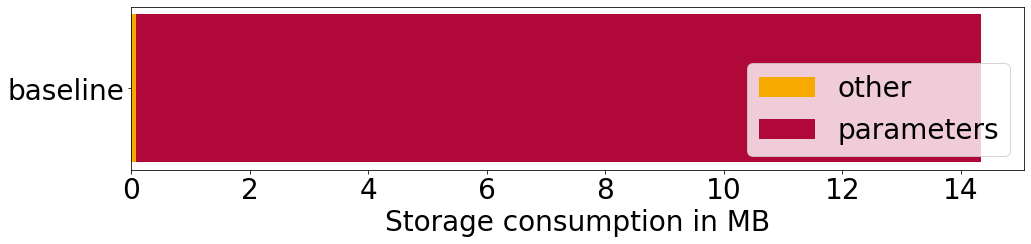

In [82]:

plot_abs_storage_dist(meta_params_dict, save_path='./saved-plots/baseline/mobilenet-storage-dist')

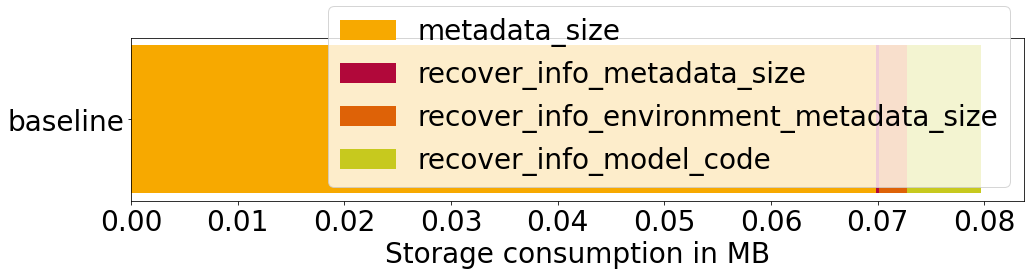

In [83]:
del flat['recover_info_parameters']
flats = {BASELINE: flat}
plot_abs_storage_dist(flats, save_path='./saved-plots/baseline/mobilenet-meta-storage-dist')

In [84]:
#################################
# Plots for parameter update approach
#################################

In [85]:
# We can see that for model versions all layers change
# Thus, the parameter update is the full parameter dict and we do not save
# Only thing we save (bigger distance between U1 and following)
# Reason: For parameter updates we do not save the environment and the code, and class name
# (for this we refer to the base model -- U1)

# TODO if we maybe also save some tiny layers:
# I THINK I HAVE SEEN something like dropout or so

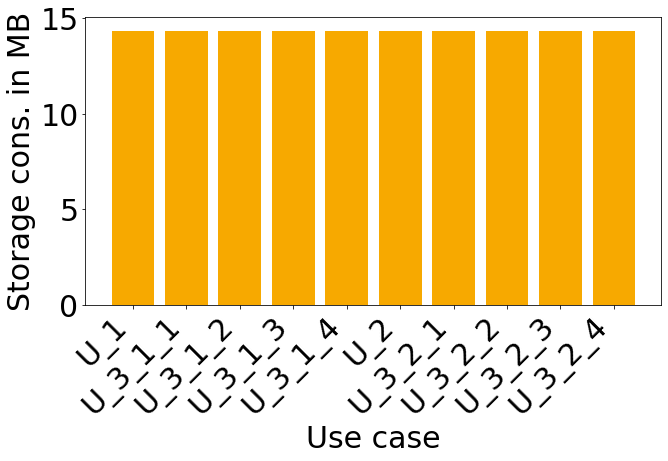

{'U_1': 14345728.0, 'U_3_1_1': 14336054.0, 'U_3_1_2': 14336054.0, 'U_3_1_3': 14336054.0, 'U_3_1_4': 14336054.0, 'U_2': 14336054.0, 'U_3_2_1': 14336054.0, 'U_3_2_2': 14336054.0, 'U_3_2_3': 14336054.0, 'U_3_2_4': 14336054.0}


In [86]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-mobilenet-version-food', _flat=True)

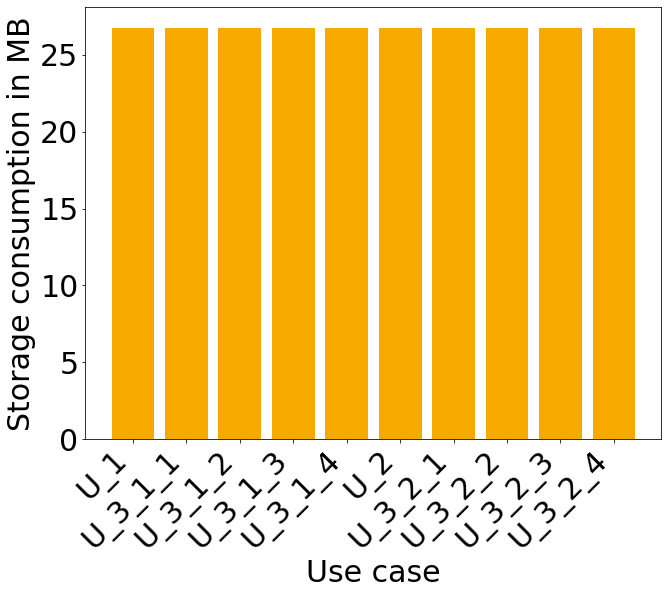

{'U_1': 26769975.0, 'U_3_1_1': 26758694.0, 'U_3_1_2': 26758694.0, 'U_3_1_3': 26758694.0, 'U_3_1_4': 26758694.0, 'U_2': 26758694.0, 'U_3_2_1': 26758694.0, 'U_3_2_2': 26758694.0, 'U_3_2_3': 26758694.0, 'U_3_2_4': 26758694.0}


In [87]:
metas = filter_meta(storage_meta, model=GOOGLENET, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-googlenet-version-food')

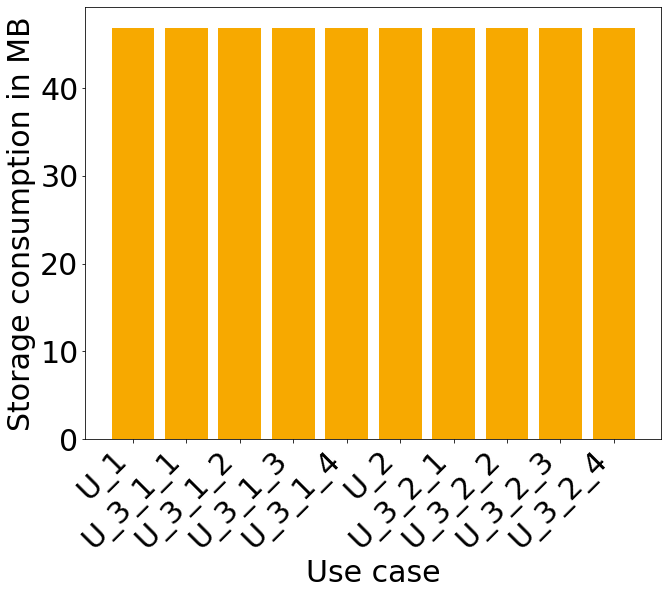

{'U_1': 46873903.0, 'U_3_1_1': 46864306.0, 'U_3_1_2': 46864306.0, 'U_3_1_3': 46864306.0, 'U_3_1_4': 46864306.0, 'U_2': 46864306.0, 'U_3_2_1': 46864306.0, 'U_3_2_2': 46864306.0, 'U_3_2_3': 46864306.0, 'U_3_2_4': 46864306.0}


In [88]:
metas = filter_meta(storage_meta, model=RESNET_18, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-resnet18-version-food')

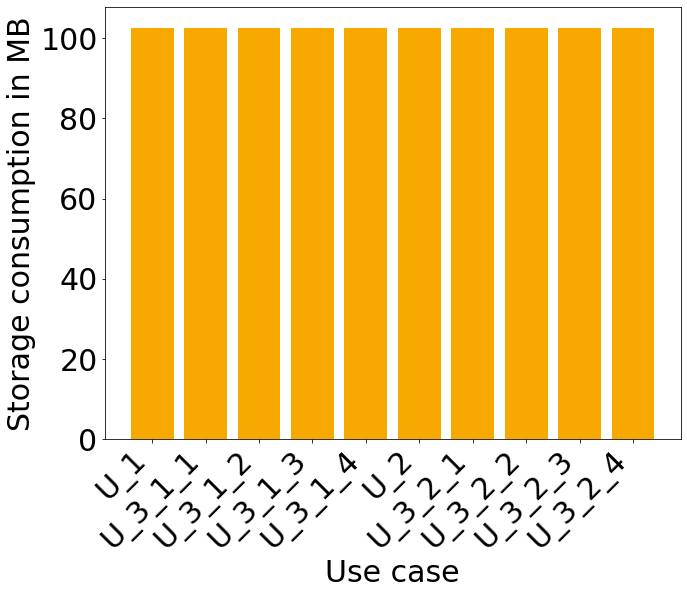

{'U_1': 102627679.0, 'U_3_1_1': 102617580.0, 'U_3_1_2': 102617580.0, 'U_3_1_3': 102617580.0, 'U_3_1_4': 102617580.0, 'U_2': 102617580.0, 'U_3_2_1': 102617580.0, 'U_3_2_2': 102617580.0, 'U_3_2_3': 102617580.0, 'U_3_2_4': 102617580.0}


In [89]:
metas = filter_meta(storage_meta, model=RESNET_50, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-resnet50-version-food')

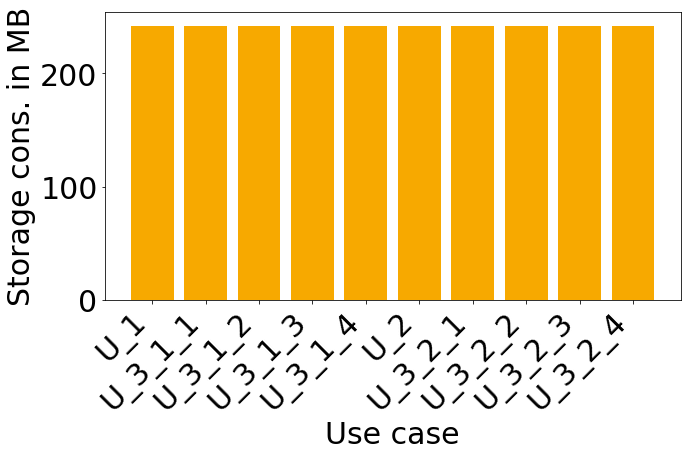

{'U_1': 241902565.0, 'U_3_1_1': 241892452.0, 'U_3_1_2': 241892452.0, 'U_3_1_3': 241892452.0, 'U_3_1_4': 241892452.0, 'U_2': 241892452.0, 'U_3_2_1': 241892452.0, 'U_3_2_2': 241892452.0, 'U_3_2_3': 241892452.0, 'U_3_2_4': 241892452.0}


In [90]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-resnet152-version-food', _flat=True)

In [91]:
# But for fine-tuned models we can see a significant improvement

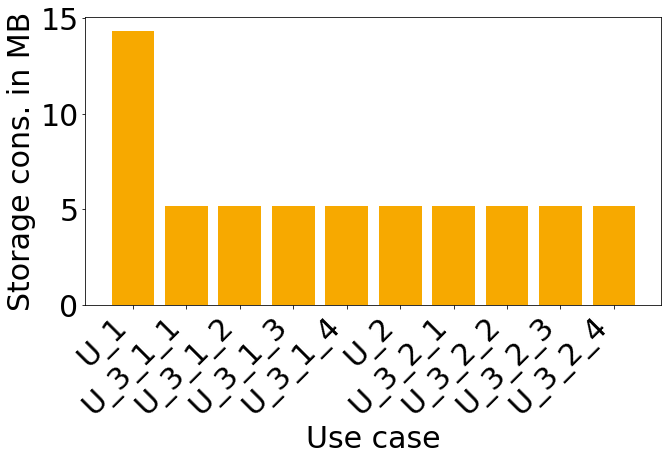

{'U_1': 14345728.0, 'U_3_1_1': 5202622.0, 'U_3_1_2': 5202622.0, 'U_3_1_3': 5202622.0, 'U_3_1_4': 5202622.0, 'U_2': 5202622.0, 'U_3_2_1': 5202622.0, 'U_3_2_2': 5202622.0, 'U_3_2_3': 5202622.0, 'U_3_2_4': 5202622.0}


In [92]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED,
                    snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-mobilenet-finetuned-food', _flat=True)

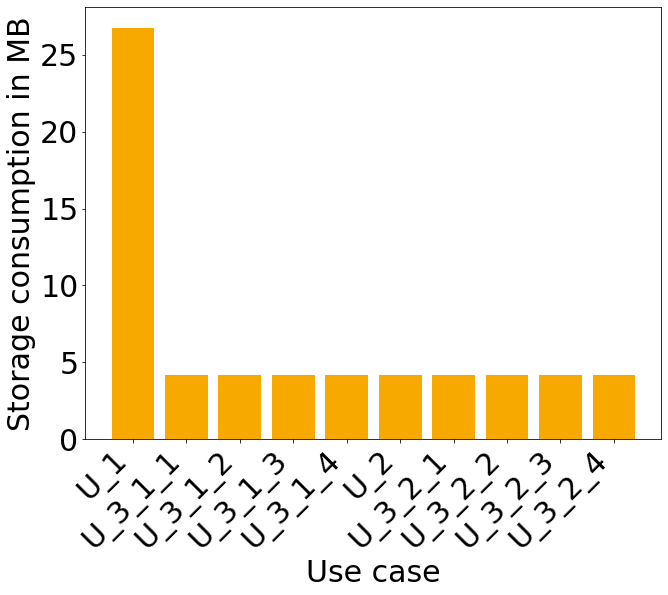

{'U_1': 26769975.0, 'U_3_1_1': 4188064.0, 'U_3_1_2': 4188064.0, 'U_3_1_3': 4188064.0, 'U_3_1_4': 4188064.0, 'U_2': 4188064.0, 'U_3_2_1': 4188064.0, 'U_3_2_2': 4188064.0, 'U_3_2_3': 4188064.0, 'U_3_2_4': 4188064.0}


In [93]:
metas = filter_meta(storage_meta, model=GOOGLENET, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED,
                    snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-googlenet-finetuned-food')

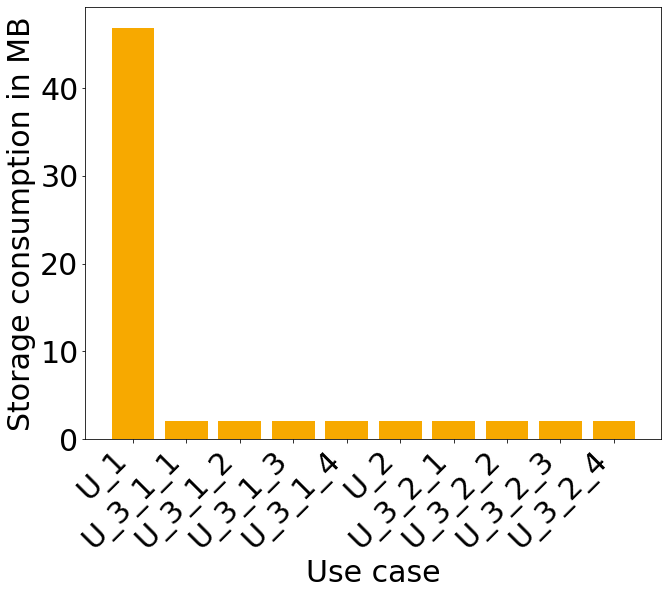

{'U_1': 46873903.0, 'U_3_1_1': 2081594.0, 'U_3_1_2': 2081594.0, 'U_3_1_3': 2081594.0, 'U_3_1_4': 2081594.0, 'U_2': 2081594.0, 'U_3_2_1': 2081594.0, 'U_3_2_2': 2081594.0, 'U_3_2_3': 2081594.0, 'U_3_2_4': 2081594.0}


In [94]:
metas = filter_meta(storage_meta, model=RESNET_18, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED,
                    snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-resnet18-finetuned-food')

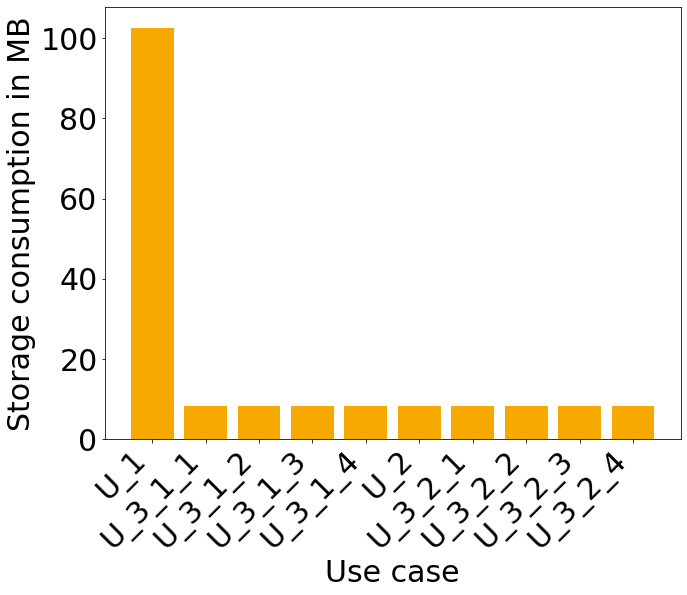

{'U_1': 102627679.0, 'U_3_1_1': 8270974.0, 'U_3_1_2': 8270974.0, 'U_3_1_3': 8270974.0, 'U_3_1_4': 8270974.0, 'U_2': 8270974.0, 'U_3_2_1': 8270974.0, 'U_3_2_2': 8270974.0, 'U_3_2_3': 8270974.0, 'U_3_2_4': 8270974.0}


In [95]:
metas = filter_meta(storage_meta, model=RESNET_50, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED,
                    snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-resnet50-finetuned-food')

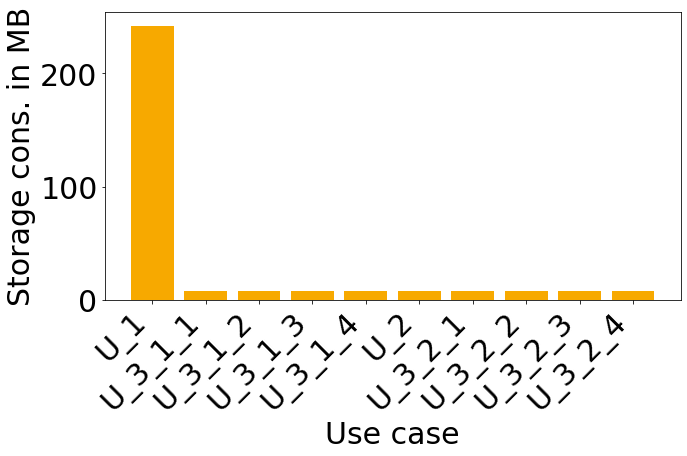

{'U_1': 241902565.0, 'U_3_1_1': 8412914.0, 'U_3_1_2': 8412914.0, 'U_3_1_3': 8412914.0, 'U_3_1_4': 8412914.0, 'U_2': 8412914.0, 'U_3_2_1': 8412914.0, 'U_3_2_2': 8412914.0, 'U_3_2_3': 8412914.0, 'U_3_2_4': 8412914.0}


In [96]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED,
                    snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/param-update/median-storage-resnet152-finetuned-food', _flat=True)

In [97]:
# The improved parameter update approach has no impact on the storage consumption
# It only influences the computation time for saving models

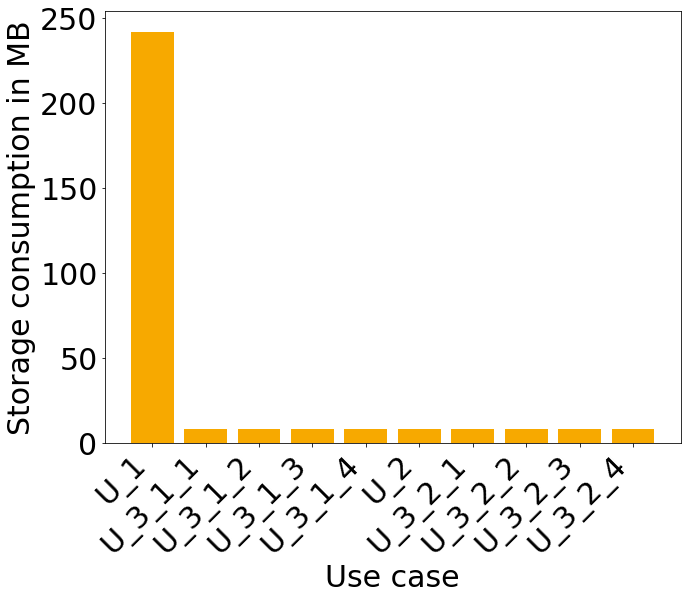

{'U_1': 241902565.0, 'U_3_1_1': 8399218.0, 'U_3_1_2': 8399218.0, 'U_3_1_3': 8399218.0, 'U_3_1_4': 8399218.0, 'U_2': 8399218.0, 'U_3_2_1': 8399218.0, 'U_3_2_2': 8399218.0, 'U_3_2_3': 8399218.0, 'U_3_2_4': 8399218.0}


In [98]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE_IMPROVED, snapshot_type=FINE_TUNED,
                    snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./saved-plots/baseline/median-storage-resnet152-version-food')

In [99]:
#################################
# Analyse the distribution of the consumed storage
#################################
meta = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')[1]
u_2_storage_consumption = meta[CONSUMPTIONS][U_2]
version_flat = flatten_dict(u_2_storage_consumption)
param_update_mobilenet_version_meta_params = split_in_params_and_rest(version_flat)

meta_params_dict['U_p (version)'] = param_update_mobilenet_version_meta_params

In [100]:
meta = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='food')[1]
u_2_storage_consumption = meta[CONSUMPTIONS][U_2]
fine_tuned_flat = flatten_dict(u_2_storage_consumption)
param_update_mobilenet_fine_tuned_meta_params = split_in_params_and_rest(fine_tuned_flat)

meta_params_dict['U_p (fine-tuned)'] = param_update_mobilenet_fine_tuned_meta_params

In [101]:
meta = filter_meta(storage_meta, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')[0]
u_2_storage_consumption = meta[CONSUMPTIONS][U_2]
meta[CONSUMPTIONS][U_2]

{'metadata_size': 202018,
 'recover_info': {'metadata_size': 245,
  'environment': {'metadata_size': 2654},
  'model_code': 7400,
  'parameters': 241690291}}

In [102]:
meta = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')[0]
u_2_storage_consumption = meta[CONSUMPTIONS][U_2]
meta[CONSUMPTIONS][U_2]

{'metadata_size': 202018,
 'recover_info': {'metadata_size': 143, 'update': 241690291}}

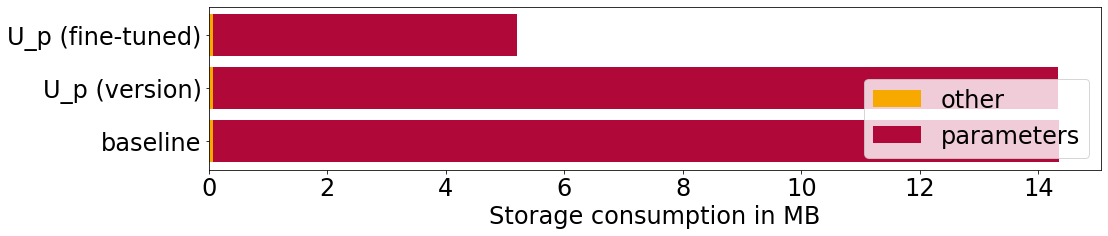

In [103]:
plot_abs_storage_dist(meta_params_dict, save_path='./saved-plots/param-update/mobilenet-storage-dist', font_size=24)

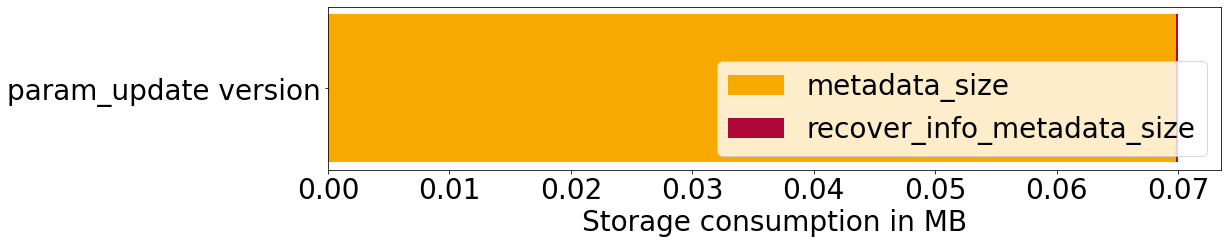

In [104]:
plt.rc('font', size=20)
del version_flat['recover_info_update']
version_flat = {PARAM_UPDATE + ' version': version_flat}
plot_abs_storage_dist(version_flat, save_path='./saved-plots/param-update/mobilenet-version-meta-storage-dist')

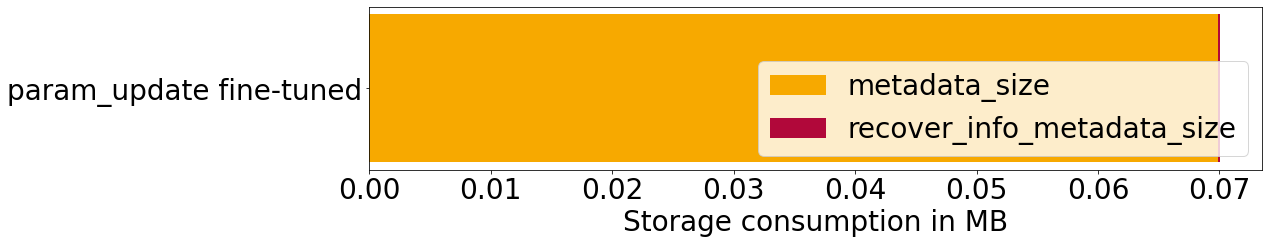

In [105]:
plt.rc('font', size=20)
del fine_tuned_flat['recover_info_update']
fine_tuned_flat = {PARAM_UPDATE + ' fine-tuned': fine_tuned_flat}
plot_abs_storage_dist(fine_tuned_flat, save_path='./saved-plots/param-update/mobilenet-finetuned-meta-storage-dist')

In [106]:
#################################
# Storage consumption for prov approach
#################################

def plot_storage_consumption_two_datasets(dataset_1, dataset_2, save_path=None, ignore_use_cases=[], y_min_max=None, fig=None, ax=None):
    if ignore_use_cases:
        for u in ignore_use_cases:
            if u in dataset_1 and u in dataset_2:
                del dataset_1[u]
                del dataset_2[u]


    plt.rc('font', size=40)
    x_labels = [k.replace('_', '-') for k in dataset_1.keys()]
    dataset_1_data = np.array(list(dataset_1.values())) * 10**-6
    print('food: {}'.format(dataset_1_data))
    dataset_2_data = np.array(list(dataset_2.values())) * 10**-6
    print('outdoor: {}'.format(dataset_2_data))
    ind = np.arange(len(x_labels))  # the x locations for the groups
    width = 0.4  # the width of the bars
    rects1 = ax.bar(ind + width / 2, dataset_1_data, width, color=A_RED, hatch='x')
    rects2 = ax.bar(ind + 1.5 * width, dataset_2_data, width, color=A_BLUE, hatch='o')
    ax.set_ylabel('consumption in MB')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(x_labels)

    plt.xticks(rotation=90)

    if y_min_max:
        axes = plt.gca()
        axes.set_ylim(y_min_max)

    if False and save_path:
        fig.savefig(save_path, bbox_inches='tight')
        fig.savefig(save_path + '.pdf', bbox_inches='tight')



food: [ 14.345728  94.948868  94.948868  94.948868  94.948868 209.511211
  94.948868  94.948868  94.948868  94.948868]
outdoor: [ 14.345728  72.336625  72.336625  72.336625  72.336625 209.511211
  72.336625  72.336625  72.336625  72.336625]
food: [241.902565  95.081848  95.081848  95.081848  95.081848 209.644191
  95.081848  95.081848  95.081848  95.081848]
outdoor: [241.902565  72.469605  72.469605  72.469605  72.469605 209.644191
  72.469605  72.469605  72.469605  72.469605]


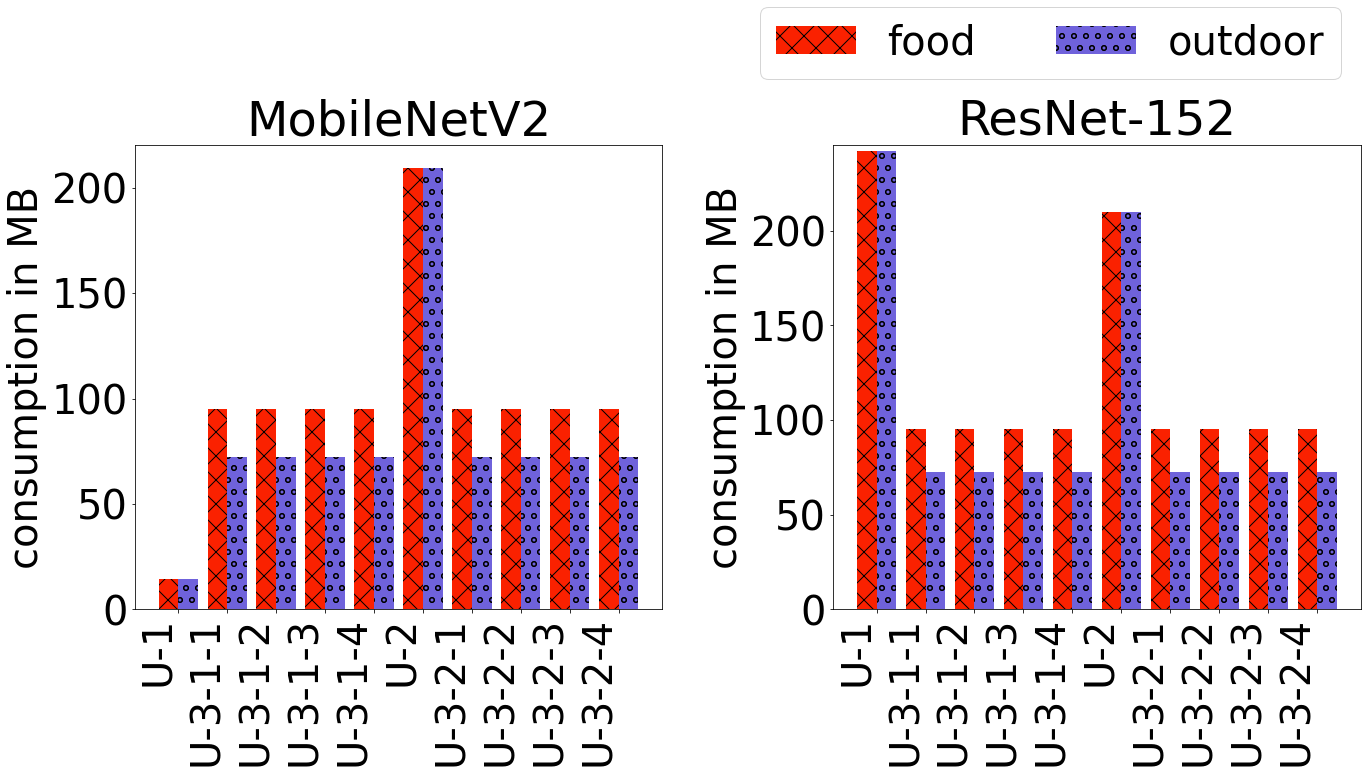

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))



mobilenet_food = filter_meta(storage_meta, model=MOBILENET, approach='provenance', snapshot_type=VERSION, snapshot_dist='food')
mobilenet_outdoor = filter_meta(storage_meta, model=MOBILENET, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')

mobilenet_food_consumptions = aggregate_fields(mobilenet_food, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]
mobilenet_outdoor_consumptions = aggregate_fields(mobilenet_outdoor, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

plot_storage_consumption_two_datasets(mobilenet_food_consumptions, mobilenet_outdoor_consumptions, ignore_use_cases=[],
                                      fig=fig, ax=axes[0],
                                      save_path='./saved-plots/provenance/mobilenet-compare-food-and-outdoor', y_min_max=[0,245])


resnet152_food = filter_meta(storage_meta, model=RESNET_152, approach='provenance', snapshot_type=VERSION, snapshot_dist='food')
resnet152_outdoor = filter_meta(storage_meta, model=RESNET_152, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')

resnet152_food_consumptions = aggregate_fields(resnet152_food, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]
resnet152_outdoor_consumptions = aggregate_fields(resnet152_outdoor, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

plot_storage_consumption_two_datasets(resnet152_food_consumptions, resnet152_outdoor_consumptions, ignore_use_cases=[],
                                      fig=fig, ax=axes[1]
                                      ,save_path='./saved-plots/provenance/resnet152-compare-food-and-outdoor', y_min_max=[0,245])

for ax in fig.axes:
    sca(ax)
    plt.xticks(rotation=90, ha='right')

p1 = patches.Patch(facecolor=A_RED, hatch='x', label='food')
p2 = patches.Patch(facecolor=A_BLUE, hatch='o', label='outdoor')

plt.legend(handles=[p1, p2], loc="lower right", bbox_to_anchor=(1, 1.10), ncol=2)

axes[0].title.set_text('MobileNetV2')
axes[1].title.set_text('ResNet-152')

plt.rc('font', size=40)
fig.tight_layout()
fig.savefig('./saved-plots/provenance/compare-food-and-outdoor.pdf', bbox_inches='tight')
plt.show()

In [140]:
def to_mb(values):
    return np.array(list(values)) * 10**-6

def plot_compare_consumptions(baseline, param_update, provenance, save_path=None, ignore_use_cases=[], y_min_max=None):
    print('B: {}'.format(baseline))
    print('P_U: {}'.format(param_update))
    print('M_Prov: {}'.format(provenance))
    if ignore_use_cases:
        for u in ignore_use_cases:
            del baseline[u]
            del param_update[u]
            del provenance[u]

    matplotlib.rcParams.update({'font.size': 24})
    fig = plt.figure()
    fig.set_size_inches(8, 6)
    x_labels = [k.replace('_', '-') for k in baseline.keys()]
    ind = np.arange(len(x_labels))  # the x locations for the groups
    width = 0.3  # the width of the bars
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, to_mb(baseline.values()), width, color=A_RED)
    rects2 = ax.bar(ind + width, to_mb(param_update.values()), width, color=A_YELLOW)
    rects3 = ax.bar(ind + 2 * width, to_mb(provenance.values()), width, color=A_BLUE)
    ax.set_ylabel('consumption in MB')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(x_labels)
    # ax.legend((rects1[0], rects2[0], rects3[0]), ('B', 'U_p', 'M_prov'), bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
    #             mode="expand", borderaxespad=0, ncol=3)
    ax.set_xlabel('Use case')

    if y_min_max:
        axes = plt.gca()
        axes.set_ylim(y_min_max)

    plt.xticks(rotation=90, ha='right')

    if save_path:
        fig.savefig(save_path, bbox_inches='tight')
        fig.savefig(save_path + '.pdf', bbox_inches='tight')

    plt.show()


B: {'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}
P_U: {'U_1': 14345728.0, 'U_3_1_1': 14336054.0, 'U_3_1_2': 14336054.0, 'U_3_1_3': 14336054.0, 'U_3_1_4': 14336054.0, 'U_2': 14336054.0, 'U_3_2_1': 14336054.0, 'U_3_2_2': 14336054.0, 'U_3_2_3': 14336054.0, 'U_3_2_4': 14336054.0}
M_Prov: {'U_1': 14345728.0, 'U_3_1_1': 72336625.0, 'U_3_1_2': 72336625.0, 'U_3_1_3': 72336625.0, 'U_3_1_4': 72336625.0, 'U_2': 209511211.0, 'U_3_2_1': 72336625.0, 'U_3_2_2': 72336625.0, 'U_3_2_3': 72336625.0, 'U_3_2_4': 72336625.0}


<Figure size 576x432 with 0 Axes>

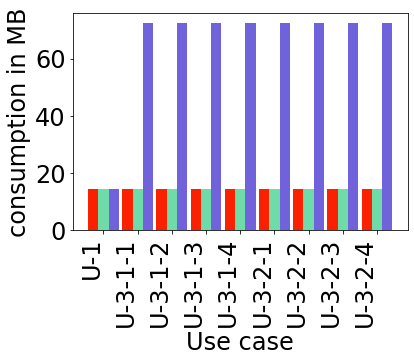

In [141]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='outdoor')
baseline_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='outdoor')
param_update_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=MOBILENET, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')
prov_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

plot_compare_consumptions(baseline_consumptions, param_update_consumptions, prov_consumptions, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparison/compare-mobilenet-version')

B: {'U_1': 241902565.0, 'U_3_1_1': 241902608.0, 'U_3_1_2': 241902608.0, 'U_3_1_3': 241902608.0, 'U_3_1_4': 241902608.0, 'U_2': 241902608.0, 'U_3_2_1': 241902608.0, 'U_3_2_2': 241902608.0, 'U_3_2_3': 241902608.0, 'U_3_2_4': 241902608.0}
P_U: {'U_1': 241902565.0, 'U_3_1_1': 241892452.0, 'U_3_1_2': 241892452.0, 'U_3_1_3': 241892452.0, 'U_3_1_4': 241892452.0, 'U_2': 241892452.0, 'U_3_2_1': 241892452.0, 'U_3_2_2': 241892452.0, 'U_3_2_3': 241892452.0, 'U_3_2_4': 241892452.0}
M_Prov: {'U_1': 241902565.0, 'U_3_1_1': 72469605.0, 'U_3_1_2': 72469605.0, 'U_3_1_3': 72469605.0, 'U_3_1_4': 72469605.0, 'U_2': 209644191.0, 'U_3_2_1': 72469605.0, 'U_3_2_2': 72469605.0, 'U_3_2_3': 72469605.0, 'U_3_2_4': 72469605.0}


<Figure size 576x432 with 0 Axes>

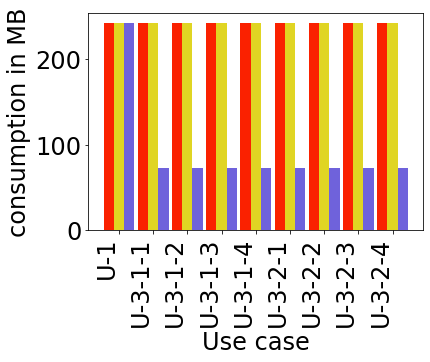

In [129]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='outdoor')
baseline_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='outdoor')
param_update_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=RESNET_152, approach='provenance', snapshot_type=VERSION, snapshot_dist='outdoor')
prov_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

plot_compare_consumptions(baseline_consumptions, param_update_consumptions, prov_consumptions, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparison/compare-resnet152-version')

B: {'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}
P_U: {'U_1': 14345728.0, 'U_3_1_1': 5202622.0, 'U_3_1_2': 5202622.0, 'U_3_1_3': 5202622.0, 'U_3_1_4': 5202622.0, 'U_2': 5202622.0, 'U_3_2_1': 5202622.0, 'U_3_2_2': 5202622.0, 'U_3_2_3': 5202622.0, 'U_3_2_4': 5202622.0}
M_Prov: {'U_1': 14345728.0, 'U_3_1_1': 72336625.0, 'U_3_1_2': 72336625.0, 'U_3_1_3': 72336625.0, 'U_3_1_4': 72336625.0, 'U_2': 209511211.0, 'U_3_2_1': 72336625.0, 'U_3_2_2': 72336625.0, 'U_3_2_3': 72336625.0, 'U_3_2_4': 72336625.0}


<Figure size 576x432 with 0 Axes>

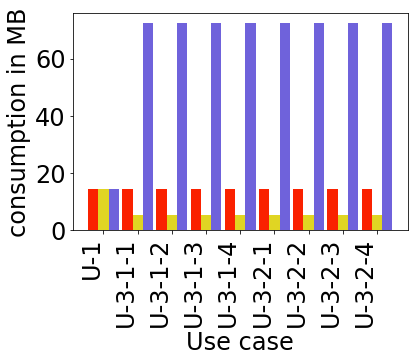

In [130]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
baseline_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
param_update_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=MOBILENET, approach='provenance', snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
prov_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

plot_compare_consumptions(baseline_consumptions, param_update_consumptions, prov_consumptions, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparison/compare-mobilenet-finetuned')

B: {'U_1': 241902565.0, 'U_3_1_1': 241902608.0, 'U_3_1_2': 241902608.0, 'U_3_1_3': 241902608.0, 'U_3_1_4': 241902608.0, 'U_2': 241902608.0, 'U_3_2_1': 241902608.0, 'U_3_2_2': 241902608.0, 'U_3_2_3': 241902608.0, 'U_3_2_4': 241902608.0}
P_U: {'U_1': 241902565.0, 'U_3_1_1': 8412914.0, 'U_3_1_2': 8412914.0, 'U_3_1_3': 8412914.0, 'U_3_1_4': 8412914.0, 'U_2': 8412914.0, 'U_3_2_1': 8412914.0, 'U_3_2_2': 8412914.0, 'U_3_2_3': 8412914.0, 'U_3_2_4': 8412914.0}
M_Prov: {'U_1': 241902565.0, 'U_3_1_1': 72469605.0, 'U_3_1_2': 72469605.0, 'U_3_1_3': 72469605.0, 'U_3_1_4': 72469605.0, 'U_2': 209644191.0, 'U_3_2_1': 72469605.0, 'U_3_2_2': 72469605.0, 'U_3_2_3': 72469605.0, 'U_3_2_4': 72469605.0}


<Figure size 576x432 with 0 Axes>

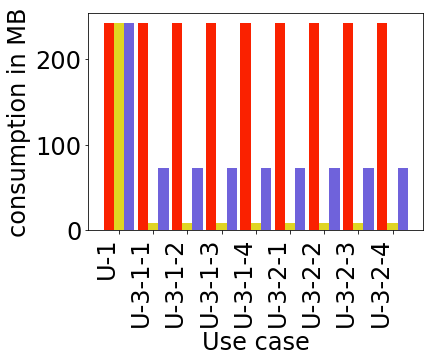

In [131]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=BASELINE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
baseline_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
param_update_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

metas = filter_meta(storage_meta, model=RESNET_152, approach='provenance', snapshot_type=FINE_TUNED, snapshot_dist='outdoor')
prov_consumptions = aggregate_fields(metas, aggregate='median', field_key=TOTAL_CONSUMPTIONS)[TOTAL_CONSUMPTIONS]

plot_compare_consumptions(baseline_consumptions, param_update_consumptions, prov_consumptions, ignore_use_cases=[U_2],
                          save_path='saved-plots/comparison/compare-resnet152-finetuned')



In [114]:
#################################
# Analyse the distribution of the consumed storage
#################################
meta = filter_meta(storage_meta, model=MOBILENET, approach=PROVENANCE, snapshot_type=VERSION, snapshot_dist='outdoor')[0]
u_3_storage_consumption = meta[CONSUMPTIONS]['U_3_1_1']
flat = flatten_dict(u_3_storage_consumption)
_prov_mobilenet_meta_params = split_in_dataset_and_rest(flat)

meta_params_dict = {PROVENANCE: _prov_mobilenet_meta_params}

In [ ]:
print(meta_params_dict)
plot_abs_storage_dist(meta_params_dict, save_path='./saved-plots/provenance/mobilenet-storage-dist')

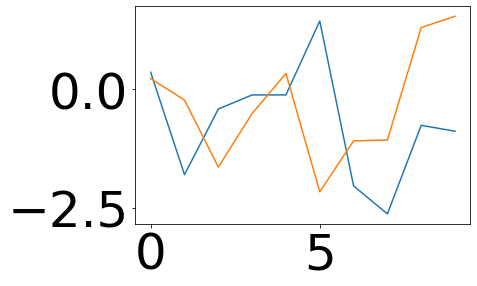

<Figure size 1008x144 with 0 Axes>

In [170]:
p1 = patches.Patch(facecolor=A_RED, label='B')
p2 = patches.Patch(facecolor=A_YELLOW, label='U_P')
p3 = patches.Patch(facecolor=A_BLUE, label='M_prov')

# plt.legend(handles=[p1, p2], loc="lower right", bbox_to_anchor=(1, 1.10), ncol=2)

import pylab
fig = pylab.figure()
figlegend = pylab.figure(figsize=(14,2))
ax = fig.add_subplot(111)
lines = ax.plot(range(10), pylab.randn(10), range(10), pylab.randn(10))
figlegend.legend(handles=[p1, p2, p3], ncol=3)
# fig.show()
# figlegend.show()
figlegend.savefig('legend.pdf')